# Session 7: Introduction to iGraph

Octavi Pascual - December 8<sup>th</sup>, 2016

## Task 1

*Reproduce the following graph seen in class, that is, plot the clustering coefficient and the average shortest path as a function of the parameter p of the Watts-Strogatz model.*

*Notice that in order to include both values — average shortest path and clustering coefficient — in the same figure, the clustering coefficient and the average shortest path values are normalized to be within the range [0, 1]. This is achieved by dividing the values by the value obtained at the left-most point, that is, when p = 0. Note the logarithmic scale of the “x” axis.*

Import of all the modules that we will need to perform our work.

In [1]:
from igraph import Graph
from igraph import plot
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

Create a graph using Watts-Strogatz model for each value of the parameter p which is the probability of rewiring an edge. We will produce N values of p evenly distributed on a log scale: from 10<sup>-3</sup> to 10<sup>0</sup> (0.001 to 1.0). For each Watts-Srogatz graph created we will compute its average shortest path and its clustering coefficient.

In [2]:
N = 50
average_shortest_path = np.array( [0.0]*N )
clustering_coefficient = np.array( [0.0]*N )
parameter_p = a = np.logspace(-3, 0, N)

for i in range(N):
    watts = Graph.Watts_Strogatz(1, 200, 2, parameter_p[i])
    average_shortest_path[i] = watts.average_path_length()
    clustering_coefficient[i] = watts.transitivity_undirected()

Now we must normalize the average shortest path and the clustering coefficient values since we will plot them in the same figure so they must be on the same scale.

In [3]:
norm1 = average_shortest_path[0]
normalized_average_shortest_path = average_shortest_path/norm1

norm2 = clustering_coefficient[0]
normalized_clustering_coefficient = clustering_coefficient/norm2

Finally we plot the graph. We use a log scale to represent the x axis which is the paramater p. We colour average shortest path in blue and clustering coefficient in red.

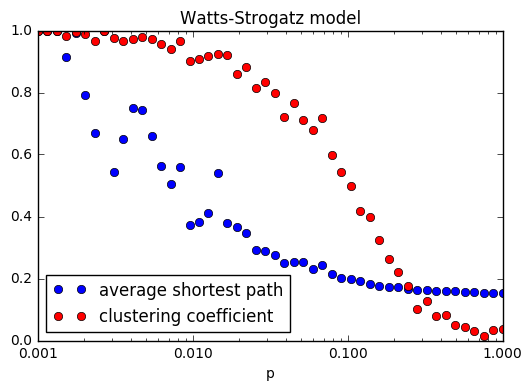

In [4]:
plt.plot(parameter_p, normalized_average_shortest_path, 'o', label='average shortest path', color='b')
plt.plot(parameter_p, normalized_clustering_coefficient, 'o', label='clustering coefficient', color='r')

plt.title('Watts-Strogatz model')
plt.xlabel('p')

axes = plt.gca()
axes.set_xscale('log')
axes.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes.legend(loc='lower left')

plt.show()

We observe that the value of the average shortest path between nodes is what drops first when the parameter p increases. That means that the more rewires we do, the lower average shortest path is. Low values of average shortest path mean that the graph has small diameter. Remember that our goal is to obtain a graph with small diameter and high clustering at the same time.

The value of the clustering coefficient also drops as the parameter p increases. That means that the more rewires we do, the lower clustering coefficient is. However in this case it starts dropping for larger values of p than for the average shortest path. Because of that, there is a range in which clustering coefficient is still high while average shortest path is low. That means that the graph has high clustering and small diameter at the same time.

Now we focus on finding an approximate value of p for which the graph has small diameter and high clustering. Such value is around 0.01 (1%). To end up this task, let's create a Watts-Strogatz graph with this value of p. We will also take a look at the degree distribution of the nodes.

The normalized average shortest path length is 0.471
The normalized clustering coefficient is 0.940


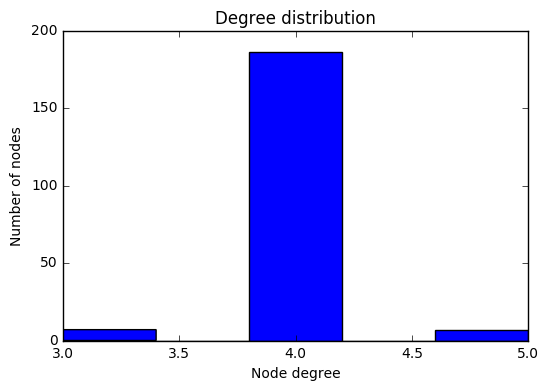

In [6]:
p = 0.01
watts = Graph.Watts_Strogatz(1, 200, 2, p)

print('The normalized average shortest path length is {0:.3f}'.format(watts.average_path_length()/norm1))
print('The normalized clustering coefficient is {0:.3f}'.format(watts.transitivity_undirected()/norm2))

plt.title('Degree distribution')
plt.xlabel('Node degree')
plt.ylabel('Number of nodes')
r = plt.hist(watts.degree(), bins=max(watts.degree()))

We confirm that the diameter is small and that the clustering coefficient is high for this value of p. If we look at the degree distribution of the nodes we see that they follow a normal distribution. That means that most nodes are averagely linked and that there are no hubs.

In conclusion, Watts-Strogatz model allows us to build networks with small diameter and high clustering, which are properties that real networks have. However, they lack the property of scale-free distribution.

## Task 2

*Load the network from edges.txt provided with this session’s files. Make sure you read it as an undirected graph.*

*1. Describe the network a little. How many edges and nodes does it have? What is its diameter? And transitivity? And degree distribution? Does it look like a random network? Visualize the network with node sizes proportional to their pagerank.*

*2. Now, use a community detection algorithm of your choice from the list provided. How many nodes does the largest community found contain? Plot the histogram of community sizes. Plot the graph with its communities.*

First of all we read the graph as an undirected one and we plot it to see how it looks like.

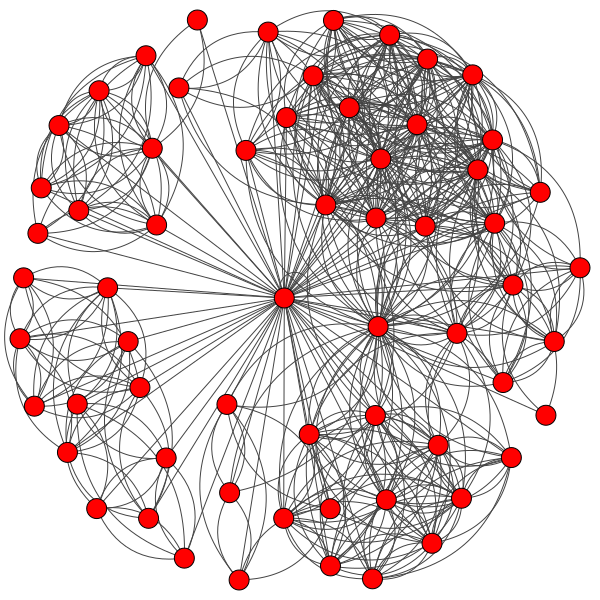

In [7]:
graph = Graph(directed=False)
graph = graph.Load('./edges.txt', format='edgelist', directed=False)
r = plot(graph, layout=graph.layout_kamada_kawai(), target='./task2_fig1.png')
display.Image(filename='./task2_fig1.png')

First of all let's obtain some basic information about the graph.

The graph has 62 nodes
The graph has 602 edges
The graph has a diameter of 2
The clustering coefficient of the graph is 0.523


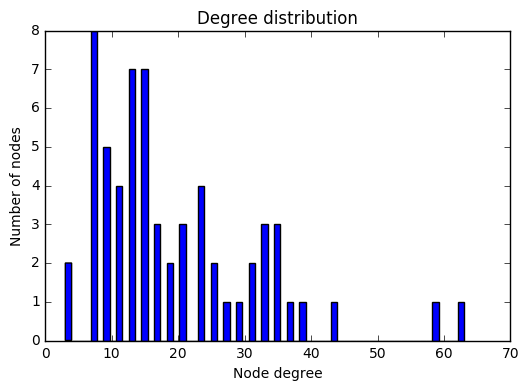

In [8]:
print('The graph has {0} nodes'.format(graph.vcount()))
print('The graph has {0} edges'.format(graph.ecount()))
print('The graph has a diameter of {0}'.format(graph.diameter()))
print('The clustering coefficient of the graph is {0:.3f}'.format(graph.transitivity_undirected()))

plt.title('Degree distribution')
plt.xlabel('Node degree')
plt.ylabel('Number of nodes')
r = plt.hist(graph.degree(), bins=max(graph.degree()))

This graph has a small diameter as its diameter is 2. That means that we can reach any pair of two nodes within two hops.

This graph also has a high clustering coefficient since its transitivity is 0.523. That means that if we take two neighbours of a node, the probability of them being connected is 0.523.

The degree distribution does not follow a normal distribution. It seems to follow a power law or scale-free distribution. That means that most of the nodes are lowly linked. We also see that there are two nodes with a very high degree: we call them hubs.

We can conclude that this graph is not a random network since it has the following properties: small diamter, high clustering coefficient and scale-free. Those three properties are followed by real networks so we can claim that this graph is a real network.

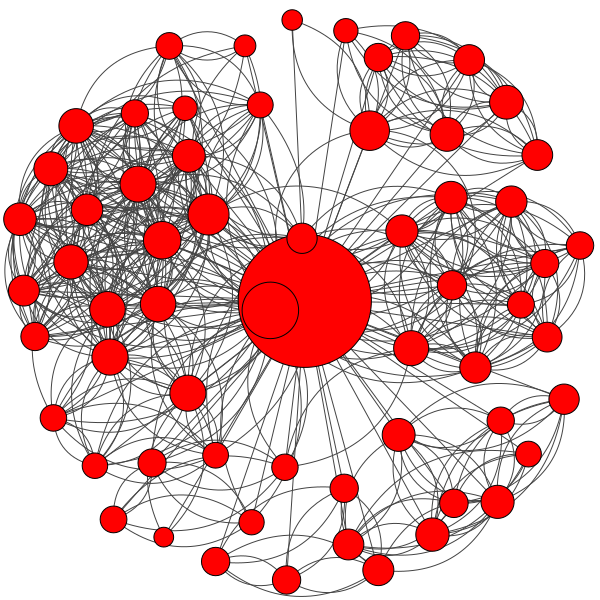

In [9]:
pageRank = graph.pagerank(directed=False)
pageRank = [x*2000 for x in pageRank]

r = plot(graph, layout=graph.layout_kamada_kawai(), target='./edgelist_pageRank.png', vertex_size=pageRank)
display.Image(filename='./edgelist_pageRank.png')

When we visualize the network with node sizes proportional to their pagerank we see that there is one node that stands out from the others. It is located in a strategic location since he is close of everyone and many paths go through him.

We will now focus on finding communities. For that we will run an algorithm based on the edge betweenness. We can read in iGraph documentation on does the algorithm do:

>The idea is that the betweenness of the edges connecting two communities is typically high, as many of the shortest paths between nodes in separate communities go through them. So we gradually remove the edge with the highest betweenness and recalculate the betweennesses after every removal. This way sooner or later the network falls of to separate components. The result of the clustering will be represented by a dendrogram.

Optimal number of communities: 7


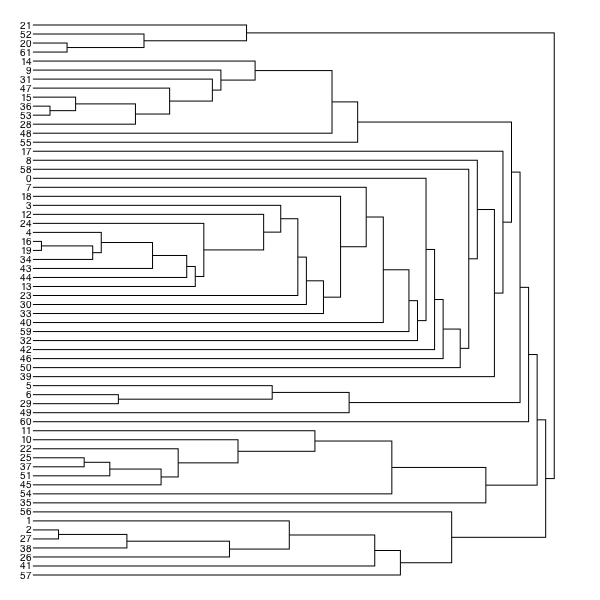

In [10]:
dendrogram = graph.community_edge_betweenness()
print('Optimal number of communities: {0}'.format(dendrogram.optimal_count))

r = plot(dendrogram, target='./task2_dendrogram.png')
display.Image(filename='./task2_dendrogram.png')

The largest community found has 26 nodes


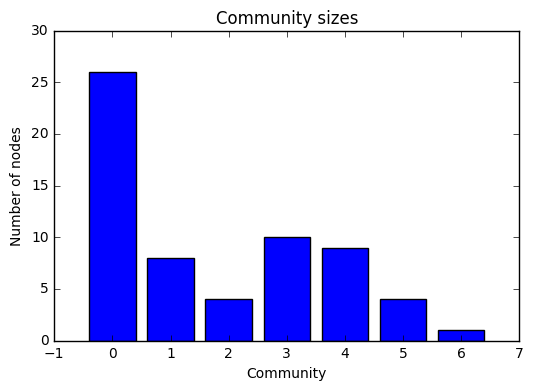

In [11]:
communities = dendrogram.as_clustering()
largestCommunity = max(len(community) for community in communities)
print('The largest community found has {0} nodes'.format(largestCommunity))

plt.title('Community sizes')
plt.xlabel('Community')
plt.ylabel('Number of nodes')
r = plt.bar(range(len(communities)), [len(c) for c in communities], align='center')

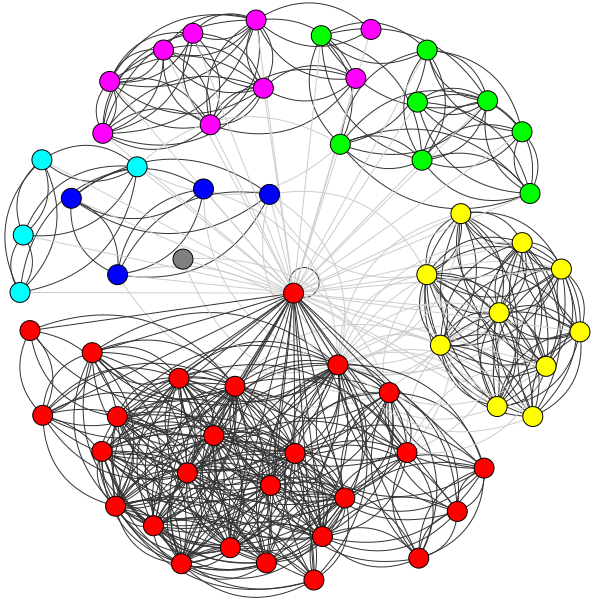

In [12]:
plot(dendrogram.as_clustering(), layout=graph.layout_kamada_kawai(), target='./task2_clustering.png')
display.Image(filename='./task2_clustering.png')

In this last figure we clearly see that the communities we found in the dendrogram are reasonable. In fact, the number of intra-cluster edges is way higher than the number of inter-cluster edges.

In conclusion we can say that this network has the same properties that a real one has: small diameter, high clustering and scale-free. Being able to generate networks with those three properties is interesting since it allows us to simulate real networks and to learn more about them.